In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sb

In [18]:
base = Path("/data/ddmg/mvseg-ordering/experiments/scripts/experiment_1_commit_pred/A/results/support_images_summary.csv")
dfA = pd.read_csv(base)


## Chart for Image Index vs Initial Dice with 25-75 IQR

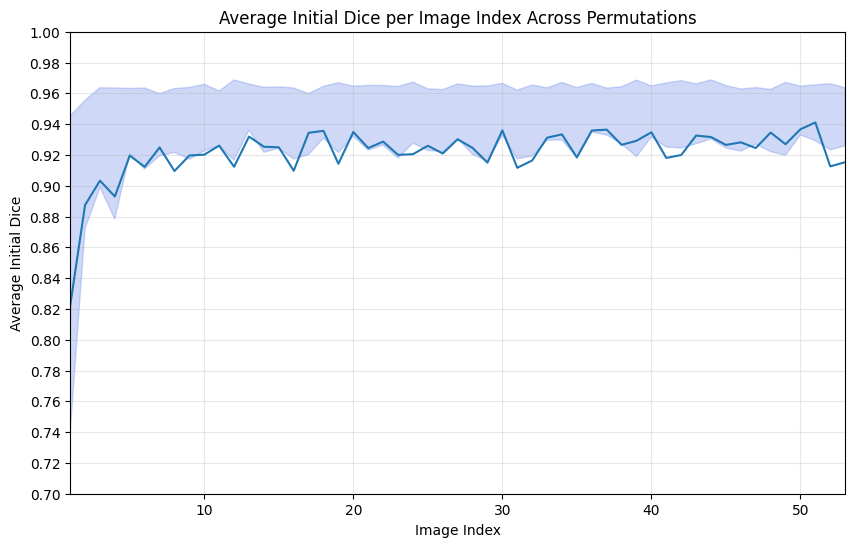

In [ ]:
image_index_groups = dfA.groupby("image_index")["initial_dice"]
stats = image_index_groups.aggregate(mean_dice=lambda s: s.mean(), q1=lambda s: s.quantile(0.25),
        q3=lambda s: s.quantile(0.75), mini=lambda s: s.min(), maxi=lambda s: s.max())

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    stats.index,
    stats["mean_dice"],
    label=f"Average Initial Dice per Image Index Across Permutations"
)
ax.fill_between(
    stats.index,
    stats["q1"],
    stats["q3"],
    color="royalblue",
    alpha=0.25,
    label="IQR"
)

ax.set_title(f"Average Initial Dice per Image Index Across Permutations")
ax.set_xlabel("Image Index")
ax.set_ylabel("Average Initial Dice")
ax.grid(alpha=0.3)
ax.set_xlim(1,53)
ax.set_ylim(0.85, 1.0)
ax.set_yticks(np.arange(0.70, 1.01, 0.02))
fig.show()
# from scipy.stats import skew
# dfA.groupby("image_index")["initial_dice"].apply(skew).describe()


## Stats Outline

In [39]:
print(stats)
stats.to_csv("/data/ddmg/mvseg-ordering/experiments/scripts/experiment_1_commit_pred/A/results/figures/stats_summary.csv")

                mean_dice            q1            q3          mini  \
image_index                                                           
0            5.323317e-12  4.405286e-12  6.180470e-12  1.966568e-12   
1            8.219722e-01  7.397812e-01  9.452825e-01  1.101336e-01   
2            8.874454e-01  8.720756e-01  9.554250e-01  3.052157e-01   
3            9.032595e-01  8.989508e-01  9.636032e-01  5.400517e-01   
4            8.930246e-01  8.783706e-01  9.634617e-01  1.689997e-01   
5            9.195426e-01  9.206951e-01  9.631651e-01  5.985185e-01   
6            9.122796e-01  9.108234e-01  9.634226e-01  2.827251e-01   
7            9.248502e-01  9.193899e-01  9.597765e-01  7.058516e-01   
8            9.095241e-01  9.216095e-01  9.631295e-01  1.200400e-02   
9            9.196447e-01  9.172567e-01  9.637778e-01  5.738749e-01   
10           9.201612e-01  9.227265e-01  9.658902e-01  5.872306e-01   
11           9.260459e-01  9.259176e-01  9.615258e-01  6.255678e-01   
12    

## Chart for Image Index vs Initial Dice with min-max range

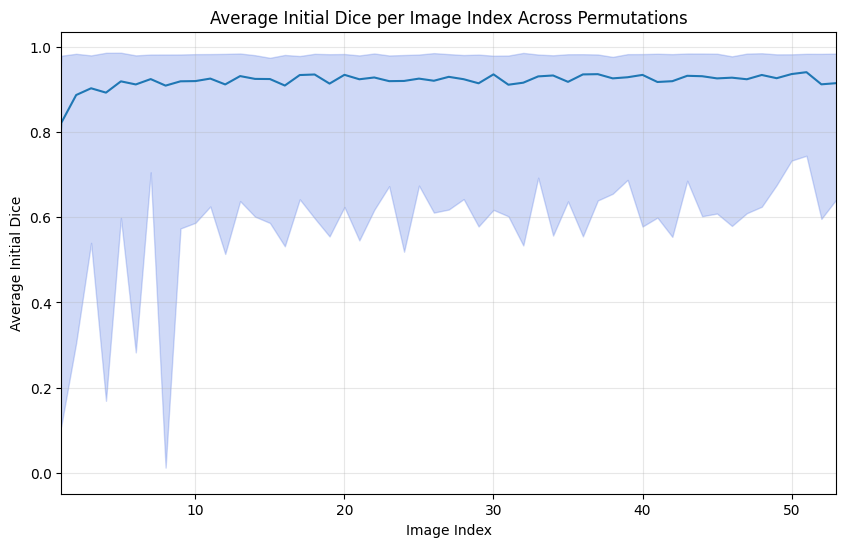

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    stats.index,
    stats["mean_dice"],
    label=f"Average Initial Dice per Image Index Across Permutations"
)
ax.fill_between(
    stats.index,
    stats["mini"],
    stats["maxi"],
    color="royalblue",
    alpha=0.25,
    label="Min-Max Range"
)

ax.set_title(f"Average Initial Dice per Image Index Across Permutations")
ax.set_xlabel("Image Index")
ax.set_ylabel("Average Initial Dice")
ax.grid(alpha=0.3)
ax.set_xlim(1,53)
# ax.set_yticks(np.arange(0.70, 1.01, 0.02))
fig.show()

# Average initial dice for each permutation

                   initial_dice
permutation_index              
0                      0.907219
1                      0.903725
2                      0.912103
3                      0.893426
4                      0.912530
...                         ...
95                     0.895761
96                     0.905215
97                     0.911541
98                     0.909182
99                     0.898126

[100 rows x 1 columns]


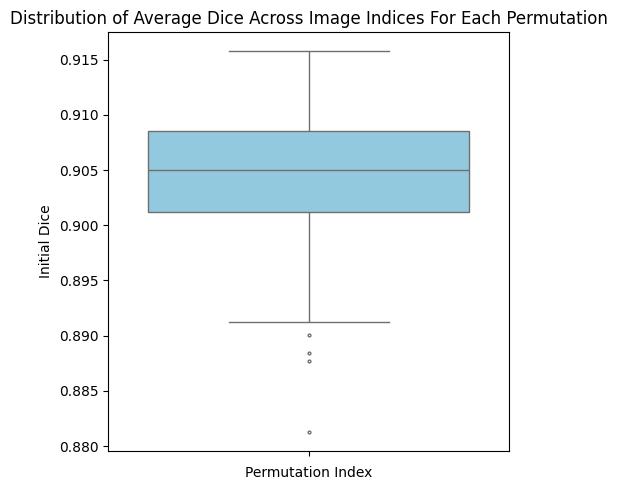

In [127]:
groups = dfA.groupby("permutation_index")["initial_dice"].mean().sort_index().to_frame()
print(groups)
plt.figure(figsize=(5, 5))
sb.boxplot(
    data=groups,
    y="initial_dice",
    color="skyblue",
    fliersize=2,  # show outliers as small dots
)
plt.title("Distribution of Average Dice Across Image Indices For Each Permutation")
plt.xlabel("Permutation Index")
plt.ylabel("Initial Dice")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


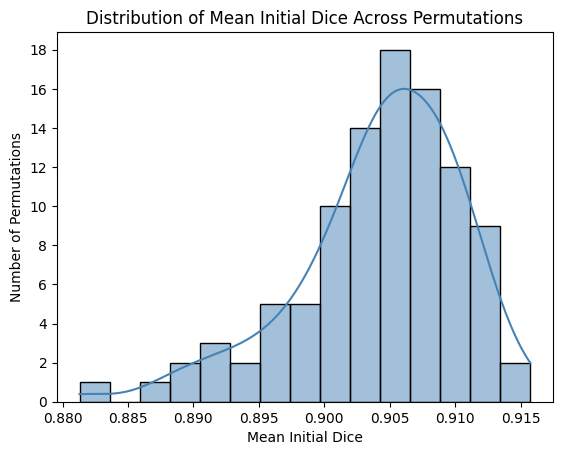

In [54]:
sb.histplot(groups["initial_dice"], bins=15, kde=True, color="steelblue")
plt.yticks(np.arange(0.0, 19.0, 2.0))
plt.title("Distribution of Mean Initial Dice Across Permutations")
plt.xlabel("Mean Initial Dice")
plt.ylabel("Number of Permutations")
plt.show()

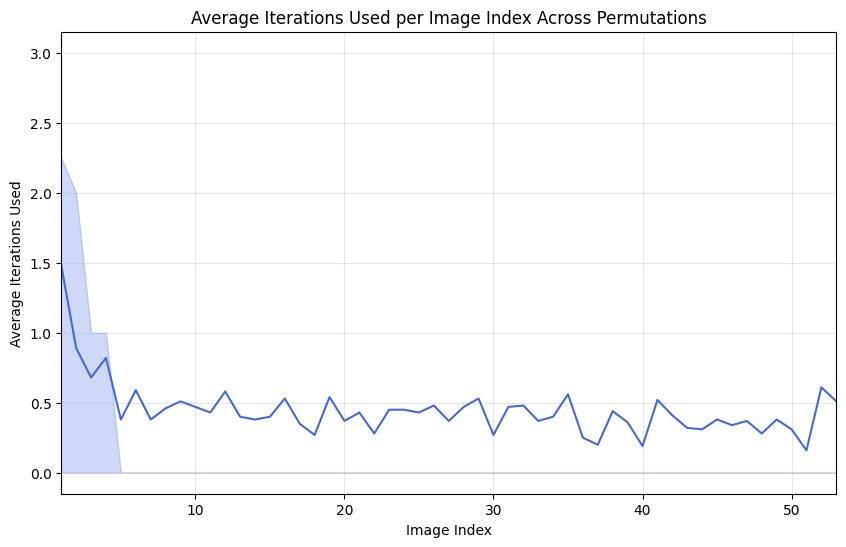

In [66]:
image_index_groups = dfA.groupby("image_index")["iterations_used"]

stats = image_index_groups.agg(
    mean_iters="mean",
    q1=lambda s: s.quantile(0.25),
    q3=lambda s: s.quantile(0.75),
    mini="min",
    maxi="max"
).reset_index() 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    stats["image_index"], 
    stats["mean_iters"], 
    color="royalblue",
    label="Average Iterations Used per Image Index Across Permutations"
)
ax.fill_between(
    stats["image_index"], 
    stats["q1"], 
    stats["q3"], 
    color="royalblue", 
    alpha=0.25, 
    label="IQR"
)
ax.set_title(f"Average Iterations Used per Image Index Across Permutations")
ax.set_xlabel("Image Index")
ax.set_ylabel("Average Iterations Used")
ax.grid(alpha=0.3)
ax.set_xlim(1,53)
fig.show()

## Plan B (Subset)

In [70]:
base2 = Path("/data/ddmg/mvseg-ordering/experiments/scripts/experiment_1_commit_pred/B/subset_support_images_summary.csv")
dfB = pd.read_csv(base2)

In [131]:
subset_perm_initial_dice = dfB.groupby(["subset_index", "permutation_index"])["initial_dice"].mean().reset_index()
print(subset_perm_initial_dice)
subset_stats = (
    subset_perm_initial_dice.groupby("subset_index")["initial_dice"]
      .aggregate(
          mean_dice="mean",
          std_dice="std",
          iqr=lambda s: s.quantile(0.75) - s.quantile(0.25),
          dice_range=lambda s: s.max() - s.min()
      )
      .reset_index()
)
# subset_stats.to_csv("/data/ddmg/mvseg-ordering/experiments/scripts/experiment_1_commit_pred/B/subset_stats.csv")

     subset_index  permutation_index  initial_dice
0               0                  0      0.899583
1               0                  1      0.899019
2               0                  2      0.898300
3               0                  3      0.902590
4               0                  4      0.907223
..            ...                ...           ...
895             8                 95      0.896117
896             8                 96      0.882026
897             8                 97      0.897604
898             8                 98      0.863338
899             8                 99      0.895331

[900 rows x 3 columns]


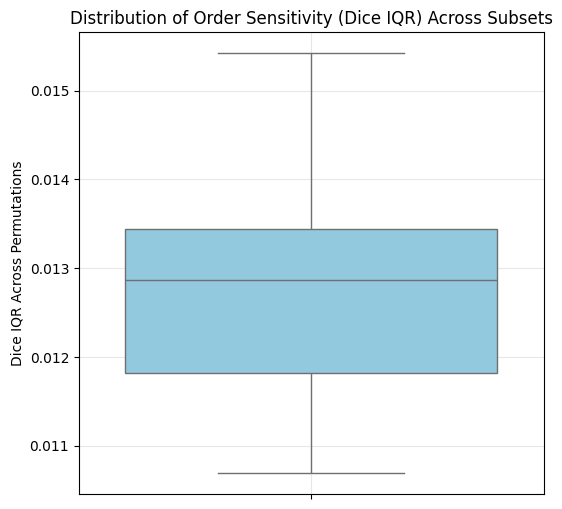

In [87]:
plt.figure(figsize=(6,6))
sb.boxplot(y=subset_stats["iqr"], color="skyblue")
plt.title("Distribution of Order Sensitivity (Dice IQR) Across Subsets")
plt.ylabel("Dice IQR Across Permutations")
plt.grid(alpha=0.3)
plt.show()

In [123]:
from scipy import stats
t_stat, p_val = stats.ttest_1samp(subset_stats["dice_range"], 0)
print(f"T-statistic: {t_stat:.3f},  p-value: {p_val:.3e}")

T-statistic: 13.145,  p-value: 1.067e-06


T=-11.613, one-tailed p=1.000e+00
